# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 13.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 16.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 20.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.9 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [13]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [14]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [16]:
client = MongoClient(mongod_connect)
db = client.gp18 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [17]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [18]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [19]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1327018730920964096
1327018731633999874
1327018731676033025
1327018733211009024
1327018734087757828
1327018734142283779
1327018734154903558
1327018734570139652
1327018734637166592
1327018735023104001
1327018735002030081
1327018737015410690
1327018737334185984
1327018737757605890
1327018739003363328
1327018739360034816
1327018740702195713
1327018740781903873
1327018739884290057
1327018741331214336
1327018742237306883
1327018742275051520
1327018742686101505
1327018743218712576
1327018743420039169
1327018743759839232
1327018744405700610
1327018745857003521
1327018745999618056
1327018746775437312
1327018747673128966
1327018748742574080
1327018749497634817
1327018749535260673
1327018750109880326
1327018751288545286
1327018752274296832
1327018753788440577
1327018753742295043
1327018755071864834
1327018754799235072
1327018755189313544
1327018755290001411
1327018755868798979
1327018755990425602
1327018756242087939
1327018756418248704
1327018756678295552
1327018757210959873
1327018757886238720


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [20]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [22]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [23]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 12 22:44:53 +0000 2020'
'Thu Nov 12 22:44:52 +0000 2020'
'Thu Nov 12 22:44:52 +0000 2020'
'Thu Nov 12 22:44:52 +0000 2020'
'Thu Nov 12 22:44:51 +0000 2020'
'Thu Nov 12 22:44:51 +0000 2020'
'Thu Nov 12 22:44:51 +0000 2020'
'Thu Nov 12 22:44:51 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:50 +0000 2020'
'Thu Nov 12 22:44:49 +0000 2020'
'Thu Nov 12 22:44:49 +0000 2020'
'Thu Nov 12 22:44:48 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:47 +0000 2020'
'Thu Nov 12 22:44:46 +0000 2020'
'Thu Nov 12 22:44:46 +0000 2020'
'Thu Nov 12 22:44:46 +0000 2020'
'Thu Nov 12 22:44:46 +0000 2020'
'Thu Nov 12 22:44:45 +0000 2020'
'Thu Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [24]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 12 22:44:31 +0000 2020'
'Thu Nov 12 22:44:31 +0000 2020'
'Thu Nov 12 22:44:31 +0000 2020'
'Thu Nov 12 22:44:31 +0000 2020'
'Thu Nov 12 22:44:30 +0000 2020'
'Thu Nov 12 22:44:30 +0000 2020'
'Thu Nov 12 22:44:29 +0000 2020'
'Thu Nov 12 22:44:29 +0000 2020'
'Thu Nov 12 22:44:29 +0000 2020'
'Thu Nov 12 22:44:29 +0000 2020'
'Thu Nov 12 22:44:28 +0000 2020'
'Thu Nov 12 22:44:28 +0000 2020'
'Thu Nov 12 22:44:28 +0000 2020'
'Thu Nov 12 22:44:28 +0000 2020'
'Thu Nov 12 22:44:28 +0000 2020'
'Thu Nov 12 22:44:27 +0000 2020'
'Thu Nov 12 22:44:26 +0000 2020'
'Thu Nov 12 22:44:26 +0000 2020'
'Thu Nov 12 22:44:26 +0000 2020'
'Thu Nov 12 22:44:25 +0000 2020'
'Thu Nov 12 22:44:25 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:24 +0000 2020'
'Thu Nov 12 22:44:23 +0000 2020'
'Thu Nov 12 22:44:23 +0000 2020'
'Thu Nov 12 22:44:22 +0000 2020'
'Thu Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [25]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4410
3934


Create a text index and print the Tweets containing specific keywords. 

In [26]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [27]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [28]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mcRough
text: @nypost Are we talking about COVID19 after the election?
----
name: Senator Bulworth
text: 24 terms (elected to 25th) in Congress? He should resign and focus on his health. #ComeOnMan
----
name: the bot formerly known as layoff
text: In the last half hour, 736 people tweeted about civil war.
#Civilwar #COVID19 #election
----
name: BostonJms
text: @senatemajldr Your election hasn't been certified so until that happens and voting irregularities in Kentucky are r… https://t.co/NEAZHJUk1M
----
name: 양산호랑이ᵞᵀ
text: RT @moonriver365: I just spoke to @JoeBiden and congratulated him on his election. We reaffirmed our firm commitment to a robust ROK-US all…
----
name: 막걸리선생
text: RT @moonriver365: I just spoke to @JoeBiden and congratulated him on his election. We reaffirmed our firm commitment to a robust ROK-US all…
----
name: Henry Theis
text: RT @ShannonJoyRadio: To every single Republican/Conservative who told me that COVID19 would disappear after the election ... 


In [29]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [30]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status_id_str,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,retweeted_status,possibly_sensitive,extended_tweet
0,5fadbb58f9e85f4de0dcb7c2,Thu Nov 12 22:40:00 +0000 2020,1327018334194429952,1327018334194429952,@nypost Are we talking about COVID19 after the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.327018e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fadba56f9e85f4de0dcb2e6,Thu Nov 12 22:42:25 +0000 2020,1327018941143797762,1327018941143797762,24 terms (elected to 25th) in Congress? He sho...,False,"{'hashtags': [{'text': 'ComeOnMan', 'indices':...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1327011440142782467,{'created_at': 'Thu Nov 12 22:12:36 +0000 2020...,"{'url': 'https://t.co/gz2e3SB8E5', 'expanded':...",0.0,0.0,low,1605220945045,NaN,NaN,NaN
2,5fadbb71f9e85f4de0dcc048,Thu Nov 12 22:31:19 +0000 2020,1327016150140477440,1327016150140477440,"In the last half hour, 736 people tweeted abou...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://laramiewatherbot.co"" rel=""nof...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fadbb6cf9e85f4de0dcbf04,Thu Nov 12 22:32:38 +0000 2020,1327016480559521803,1327016480559521803,@senatemajldr Your election hasn't been certif...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326997e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fadbb74f9e85f4de0dcc177,Thu Nov 12 22:30:07 +0000 2020,1327015846653267968,1327015846653267968,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020...,NaN,NaN
5,5fadbb6bf9e85f4de0dcbe47,Thu Nov 12 22:33:28 +0000 2020,1327016689406410752,1327016689406410752,RT @moonriver365: I just spoke to @JoeBiden an...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 00:31:46 +0000 2020...,NaN,NaN
6,5fadbb68f9e85f4de0dcbd3a,Thu Nov 12 22:34:35 +0000 2020,1327016969980182528,1327016969980182528,RT @ShannonJoyRadio: To every single Republica...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 18:16:03 +0000 2020...,NaN,NaN
7,5fadbb5df9e85f4de0dcb96f,Thu Nov 12 22:38:25 +0000 2020,1327017934657609732,1327017934657609732,"RT @MindfulSkeptics: Real talk, congrats to @r...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 17:33:15 +0000 2020...,NaN,NaN
8,5fadbb73f9e85f4de0dcc123,Thu Nov 12 22:30:25 +0000 2020,1327015922096349186,1327015922096349186,RT @justin_hart: OK folks. Shifting some focus...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{'created_at': 'Thu Nov 12 20:15:00 +0000 2020...,NaN,NaN
9,5fadbb65f9e85f4de0dcbc5f,Thu Nov 12 22:35:26 +0000 2020,1327017185034854406,1327017185034854406,If the gop wins the election in Georgia and @R...,True,"{'hashtags': [], 'symbols':

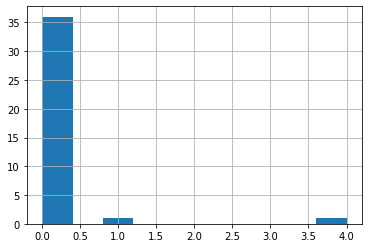

In [31]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count